In [ ]:
import cv2
import numpy as np
from skimage.feature import daisy
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

orig_img = cv2.imread('original.jpg')
dist_img = cv2.imread('dis.jpg')

# конвертуємо в чб
orig_gray = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)
dist_gray = cv2.cvtColor(dist_img, cv2.COLOR_BGR2GRAY)

# витягуємо DAISY дескриптори для обох зображень
orig_desc = daisy(orig_gray, step=8, radius=16, rings=2, histograms=6, orientations=8, visualize=False)
dist_desc = daisy(dist_gray, step=8, radius=16, rings=2, histograms=6, orientations=8, visualize=False)






In [ ]:
# шукаємо дистанцію між дескрипторами двох зображень
distances = cdist(orig_desc.reshape(-1, orig_desc.shape[-1]), dist_desc.reshape(-1, dist_desc.shape[-1]))

# знаходимо накраще співпадіння серед дескрипторів
min_index = np.argmin(distances)
match_x, match_y = np.unravel_index(min_index, distances.shape)

# вираховуємо параметри геометричної трансформації
h, w = orig_gray.shape
M, mask = cv2.findHomography(np.array([[match_y*8, match_x*8],
                                       [(match_y+1)*8, match_x*8],
                                       [(match_y+1)*8, (match_x+1)*8],
                                       [match_y*8, (match_x+1)*8]]),
                             np.array([[0, 0],
                                       [w, 0],
                                       [w, h],
                                       [0, h]]))

angle = -np.degrees(np.arctan2(M[0, 1], M[0, 0]))
tx = M[0, 2]
ty = M[1, 2]


# виводимо параметри геометричної трансформації
print("Angle of rotation: {:.2f} degrees".format(angle))
print("Translation in x: {:.2f} pixels".format(tx))
print("Translation in y: {:.2f} pixels".format(ty))


Angle of rotation: -0.00 degrees
Translation in x: -29348800.00 pixels
Translation in y: -21969600.00 pixels


In [ ]:
def match_images(img1, img2):
    
    # Ініціалізуємо' детектор функцій SIFT і екстрактор дескрипторів
    sift = cv2.SIFT_create()

    # Визначаємо ключові точки та обчисліть дескриптори для обох зображень
    kp1, desc1 = sift.detectAndCompute(orig_gray, None)
    kp2, desc2 = sift.detectAndCompute(dist_gray, None)

    # Зіставляємо ключові точки за допомогою грубої сили
    bf = cv2.BFMatcher(cv2.NORM_L2)
    matches = bf.match(desc1, desc2)

    # Сортуємо збіги за відстанню
    matches = sorted(matches, key=lambda x: x.distance)

    # Перетворюємо зображення із формату BGR у формат RGB для нанесення графіків
    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)



    # Малюємо відповідні ключові точки як графік
    img_matches = cv2.drawMatches(img1_rgb, kp1, img2_rgb, kp2, matches[:40], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.imshow(img_matches)
    plt.show()

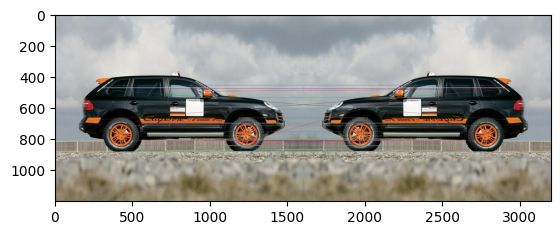

In [ ]:


img1 = cv2.imread('original.jpg')
img2 = cv2.imread('dis.jpg')
# Call match_images function
match_images(img1, img2)


